<h1 style="color:DarkSlateBlue;">Brazilian E-Commerce Analysis Project</h1>

<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
In this project, I explore the Brazilian e-commerce (Olist) dataset and conduct an in-depth Exploratory Data Analysis (EDA).
The analysis focuses on customer behavior, delivery performance, and spending patterns across different cities and states.
The insights gained aim to provide a better understanding of the Brazilian e-commerce market, highlight promising areas for investment, and identify regions where operational improvements could enhance customer satisfaction and business performance.</div>


<h2 style="color:RoyalBlue;">EDA Questions</h2>


<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
I load the different tables provided in the Olist dataset, including customer information, order details, payment information, product metadata, and seller information.</div>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


orders = pd.read_csv("C:/Users/liadz/Downloads/Brazil_project/data/olist_orders_dataset.csv")
customers = pd.read_csv('C:/Users/liadz/Downloads/Brazil_project/data/olist_customers_dataset.csv')
payments = pd.read_csv('C:/Users/liadz/Downloads/Brazil_project/data/olist_order_payments_dataset.csv')
order_items = pd.read_csv("C:/Users/liadz/Downloads/Brazil_project/data/olist_order_items_dataset.csv")
products = pd.read_csv("C:/Users/liadz/Downloads/Brazil_project/data/olist_products_dataset.csv")
category_translation = pd.read_csv("C:/Users/liadz/Downloads/Brazil_project/data/product_category_name_translation.csv")
sellers = pd.read_csv('C:/Users/liadz/Downloads/Brazil_project/data/olist_sellers_dataset.csv')


orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [48]:
orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [49]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
convert the relevant columns to datetime format to enable time-based analysis of order patterns and delivery performance.</div>


In [50]:
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

# pd.to_datetime to each date column
for col in date_columns:
    orders[col] = pd.to_datetime(orders[col])

orders.dtypes


order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
In this section, I create a new feature to extract the purchase month and year for each order.  
Then I group the orders by month to visualize the trend of order volume over time.  
This helps identify seasonality patterns, growth trends, and peak shopping periods.
</div>

In [51]:
# Create a year-month column 
orders['purchase_year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

orders[['order_purchase_timestamp', 'purchase_year_month']].head()


,order_purchase_timestamp,purchase_year_month
0,2017-10-02 10:56:33,2017-10
1,2018-07-24 20:41:37,2018-07
2,2018-08-08 08:38:49,2018-08
3,2017-11-18 19:28:06,2017-11
4,2018-02-13 21:18:39,2018-02


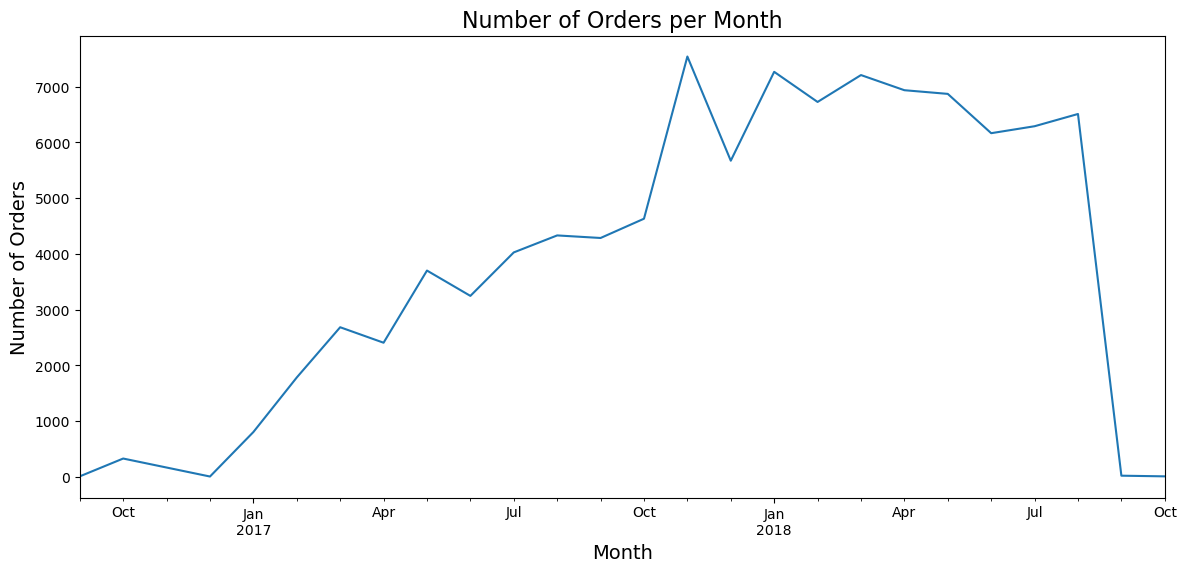

In [52]:
# Group orders by purchase year-month and count them
monthly_orders = orders.groupby('purchase_year_month').size()

plt.figure(figsize=(14,6))
monthly_orders.plot()

plt.title('Number of Orders per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.show()



<h2 style="color:Crimson;">How Long Does It Take to Deliver an Order?</h2>

<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
In this section, I calculate the actual delivery time in days for each order by subtracting the purchase date from the delivery date.  
Then I visualize the distribution of delivery times to understand typical delivery performance and identify common delivery durations.</div>  

In [53]:
# Calculate actual delivery time in days for each order
orders['actual_delivery_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

orders[['order_purchase_timestamp', 'order_delivered_customer_date', 'actual_delivery_days']].head(n=10)


,order_purchase_timestamp,order_delivered_customer_date,actual_delivery_days
0,2017-10-02 10:56:33,2017-10-10 21:25:13,8.0
1,2018-07-24 20:41:37,2018-08-07 15:27:45,13.0
2,2018-08-08 08:38:49,2018-08-17 18:06:29,9.0
3,2017-11-18 19:28:06,2017-12-02 00:28:42,13.0
4,2018-02-13 21:18:39,2018-02-16 18:17:02,2.0
5,2017-07-09 21:57:05,2017-07-26 10:57:55,16.0
6,2017-04-11 12:22:08,NaT,NaN
7,2017-05-16 13:10:30,2017-05-26 12:55:51,9.0
8,2017-01-23 18:29:09,2017-02-02 14:08:10,9.0
9,2017-07-29 11:55:02,2017-08-16 17:14:30,18.0


###  Distribution of Delivery Times


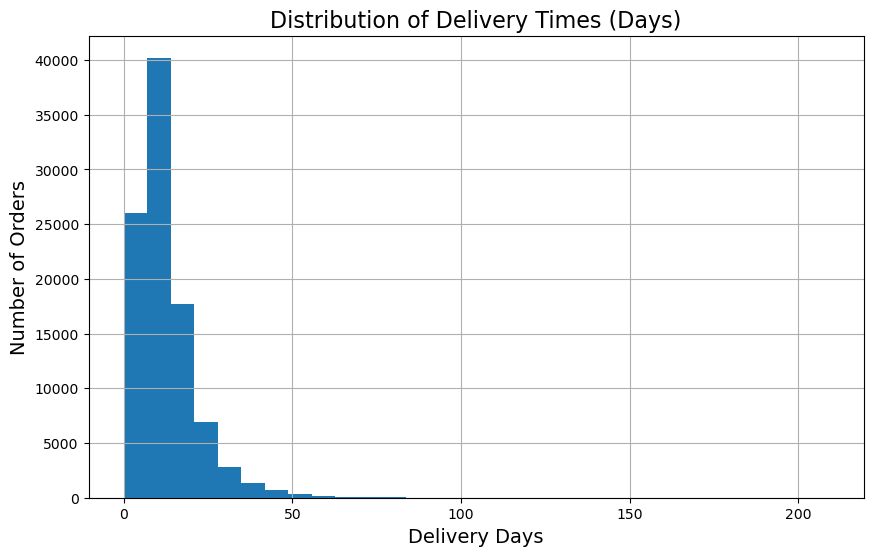

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
orders['actual_delivery_days'].hist(bins=30)

plt.title('Distribution of Delivery Times (Days)', fontsize=16)
plt.xlabel('Delivery Days', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.show()


### Average and Standard Deviation of Delivery Time


In [55]:
# Filter only delivered orders
delivered_orders = orders[orders['actual_delivery_days'].notnull()]

# Calculate average delivery time
average_delivery_days = delivered_orders['actual_delivery_days'].mean()

# Calculate standard deviation of delivery time
std_delivery_days = delivered_orders['actual_delivery_days'].std()

print(f"Average Delivery Time: {average_delivery_days:.2f} days")
print(f"Standard Deviation of Delivery Time: {std_delivery_days:.2f} days")


Average Delivery Time: 12.09 days
Standard Deviation of Delivery Time: 9.55 days


### Check If the Company Met Its Promised Delivery Dates


In [56]:
delivered_orders = delivered_orders.copy()

# Create a new column to check if the delivery was late
delivered_orders['late_delivery'] = delivered_orders['order_delivered_customer_date'] > delivered_orders['order_estimated_delivery_date']

# Count how many late vs on-time deliveries
late_delivery_counts = delivered_orders['late_delivery'].value_counts()

# Calculate percentage of late deliveries
late_delivery_percentage = (late_delivery_counts[True] / late_delivery_counts.sum()) * 100

print("Late Deliveries Count:")
print(late_delivery_counts)
print(f"\nPercentage of Late Deliveries: {late_delivery_percentage:.2f}%")


Late Deliveries Count:
late_delivery
False    88649
True      7827
Name: count, dtype: int64

Percentage of Late Deliveries: 8.11%


<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
In most cases (91.89%), deliveries arrive on time, although this is a high percentage, there is room for improvement in delivery times.</div>

<h2 style="color:Crimson;">How Does Average Delivery Time Vary Across Cities?</h2>

<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
In this section, I merge customer location information into the orders dataset to analyze delivery times across different cities.  
Then I calculate the average and standard deviation of delivery times for each city and and filters out cities with less than 10 deliveries to ensure statistical reliability.  
This allows me to identify the cities with the fastest and slowest average delivery times, providing insights into regional logistics performance.</div> 


In [57]:
# Merge customer information into delivered_orders
delivered_orders = delivered_orders.merge(customers[['customer_id', 'customer_city', 'customer_state']], on='customer_id', how='left')

delivered_orders[['customer_id', 'customer_city', 'customer_state']].head()


,customer_id,customer_city,customer_state
0,9ef432eb6251297304e76186b10a928d,sao paulo,SP
1,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras,BA
2,41ce2a54c0b03bf3443c3d931a367089,vianopolis,GO
3,f88197465ea7920adcdbec7375364d82,sao goncalo do amarante,RN
4,8ab97904e6daea8866dbdbc4fb7aad2c,santo andre,SP


In [58]:
# Group by customer city and calculate mean and standard deviation of delivery times
# Add a count of orders per city
city_delivery_stats = delivered_orders.groupby('customer_city')['actual_delivery_days'].agg(['mean', 'std', 'count']).reset_index()

city_delivery_stats.columns = ['customer_city', 'avg_delivery_days', 'std_delivery_days', 'num_orders']

city_delivery_stats.head(n=10)


,customer_city,avg_delivery_days,std_delivery_days,num_orders
0,abadia dos dourados,11.333333,8.504901,3
1,abadiania,29.000000,NaN,1
2,abaete,9.916667,4.999242,12
3,abaetetuba,26.545455,14.590159,11
4,abaiara,35.000000,14.142136,2
5,abaira,14.500000,0.707107,2
6,abare,17.000000,2.828427,2
7,abatia,18.666667,5.507571,3
8,abdon batista,14.000000,NaN,1
9,abelardo luz,18.666667,13.793718,6


In [59]:
# Keep only cities with at least 10 delivered orders
filtered_city_delivery_stats = city_delivery_stats[city_delivery_stats['num_orders'] >= 10]

# Top 10 fastest cities (with at least 10 orders)
fastest_cities = filtered_city_delivery_stats.sort_values('avg_delivery_days', ascending=True).head(10)

# Top 10 slowest cities (with at least 10 orders)
slowest_cities = filtered_city_delivery_stats.sort_values('avg_delivery_days', ascending=False).head(10)

print("Top 10 Fastest Cities (with ≥10 orders):")
print(fastest_cities)

print("\nTop 10 Slowest Cities (with ≥10 orders):")
print(slowest_cities)



Top 10 Fastest Cities (with ≥10 orders):
               customer_city  avg_delivery_days  std_delivery_days  num_orders
473           biritiba-mirim           5.400000           1.505545          10
2887                     poa           6.105882           4.611124          85
314                    aruja           6.132353           3.573971          68
2856   pirapora do bom jesus           6.312500           2.821790          16
3741         taboao da serra           6.443662           4.910542         284
3981  vargem grande paulista           6.651163           3.859951          43
3527   sao lourenco da serra           6.666667           4.292347          12
1084                   cotia           6.714876           4.485720         242
3321     santana de parnaiba           6.735955           4.814403         178
1221                duartina           6.800000           4.442222          10

Top 10 Slowest Cities (with ≥10 orders):
            customer_city  avg_delivery_days  st

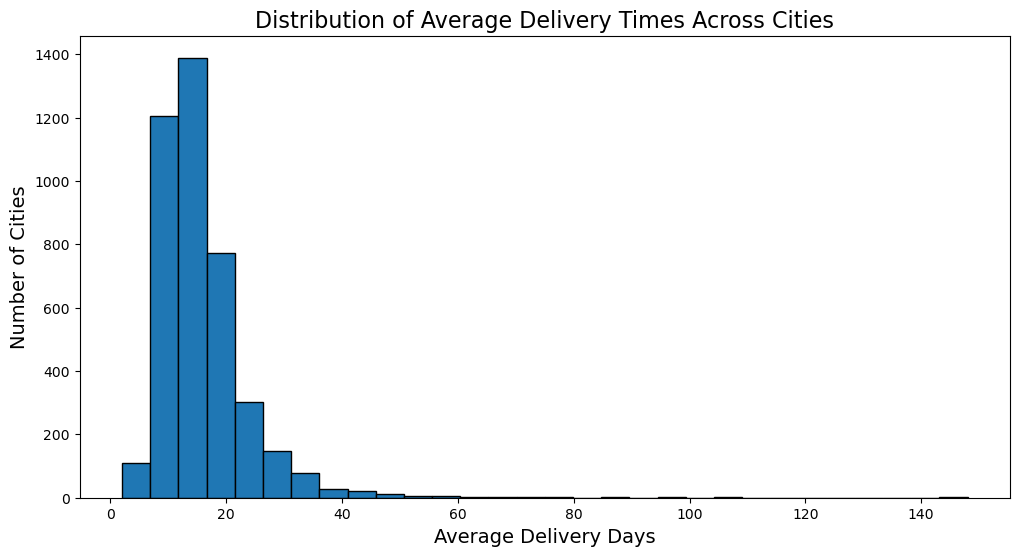

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.hist(city_delivery_stats['avg_delivery_days'], bins=30, edgecolor='black')

plt.title('Distribution of Average Delivery Times Across Cities', fontsize=16)
plt.xlabel('Average Delivery Days', fontsize=14)
plt.ylabel('Number of Cities', fontsize=14)
plt.show()


<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
Top 10 fastest and slowest cities</div>

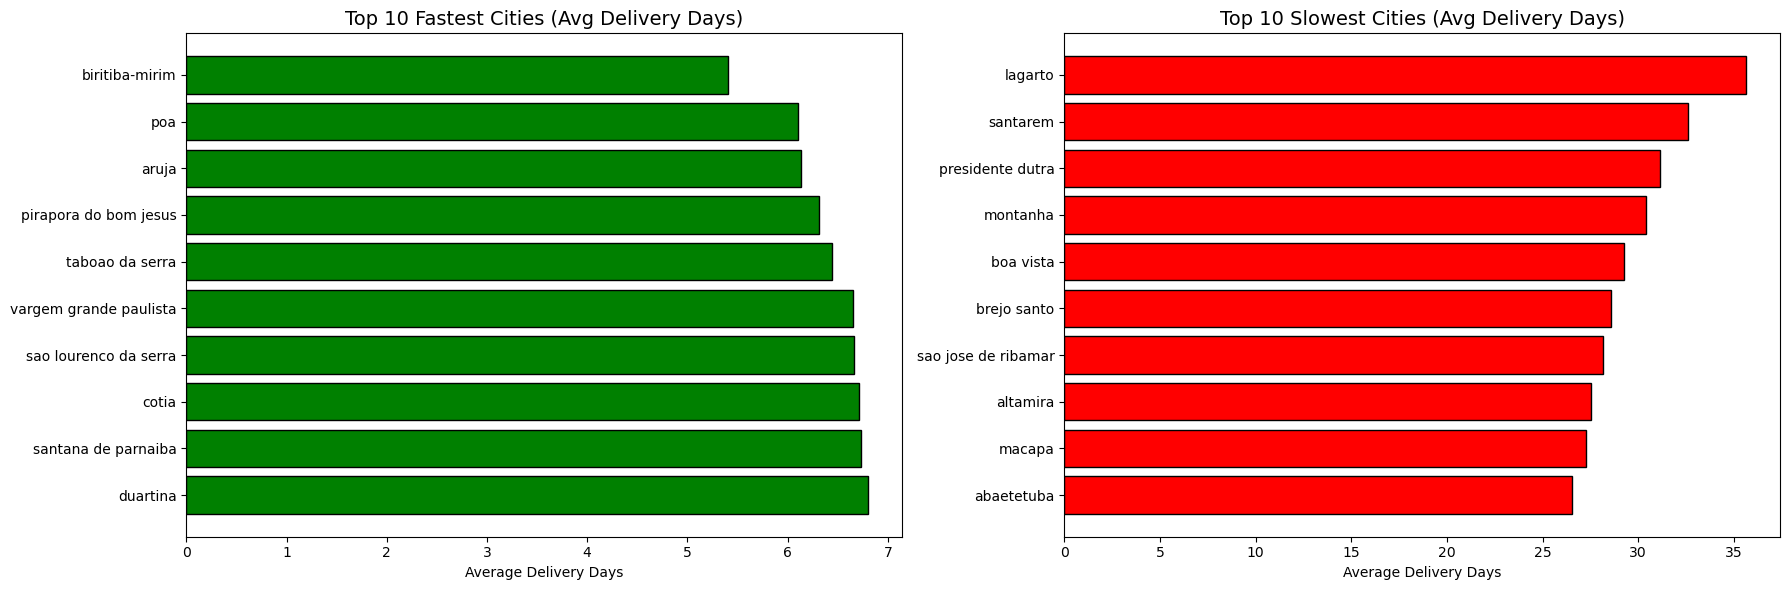

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
plt.barh(fastest_cities['customer_city'], fastest_cities['avg_delivery_days'], color='green', edgecolor='black')
plt.title('Top 10 Fastest Cities (Avg Delivery Days)', fontsize=14)
plt.xlabel('Average Delivery Days')
plt.gca().invert_yaxis()  # Fastest on top

plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
plt.barh(slowest_cities['customer_city'], slowest_cities['avg_delivery_days'], color='red', edgecolor='black')
plt.title('Top 10 Slowest Cities (Avg Delivery Days)', fontsize=14)
plt.xlabel('Average Delivery Days')
plt.gca().invert_yaxis()  # Slowest on top

plt.tight_layout()
plt.show()


<h2 style="color:Crimson;">How Do Shipping Times Vary Between States?</h2>

<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
In this section, I analyze how delivery times vary between Brazilian states.  
I calculate the average and standard deviation of delivery times per state, then visualize the results with a bar chart.  
This helps identify regional differences in logistics performance and highlights states with faster or slower deliveries.
</div>


In [62]:
# Group by customer state and calculate mean and standard deviation of delivery times
state_delivery_stats = delivered_orders.groupby('customer_state')['actual_delivery_days'].agg(['mean', 'std', 'count']).reset_index()

state_delivery_stats.columns = ['customer_state', 'avg_delivery_days', 'std_delivery_days', 'num_orders']

state_delivery_stats.head()


,customer_state,avg_delivery_days,std_delivery_days,num_orders
0,AC,20.637500,10.777665,80
1,AL,24.040302,11.480919,397
2,AM,25.986207,13.852891,145
3,AP,26.731343,21.413379,67
4,BA,18.866400,11.695508,3256


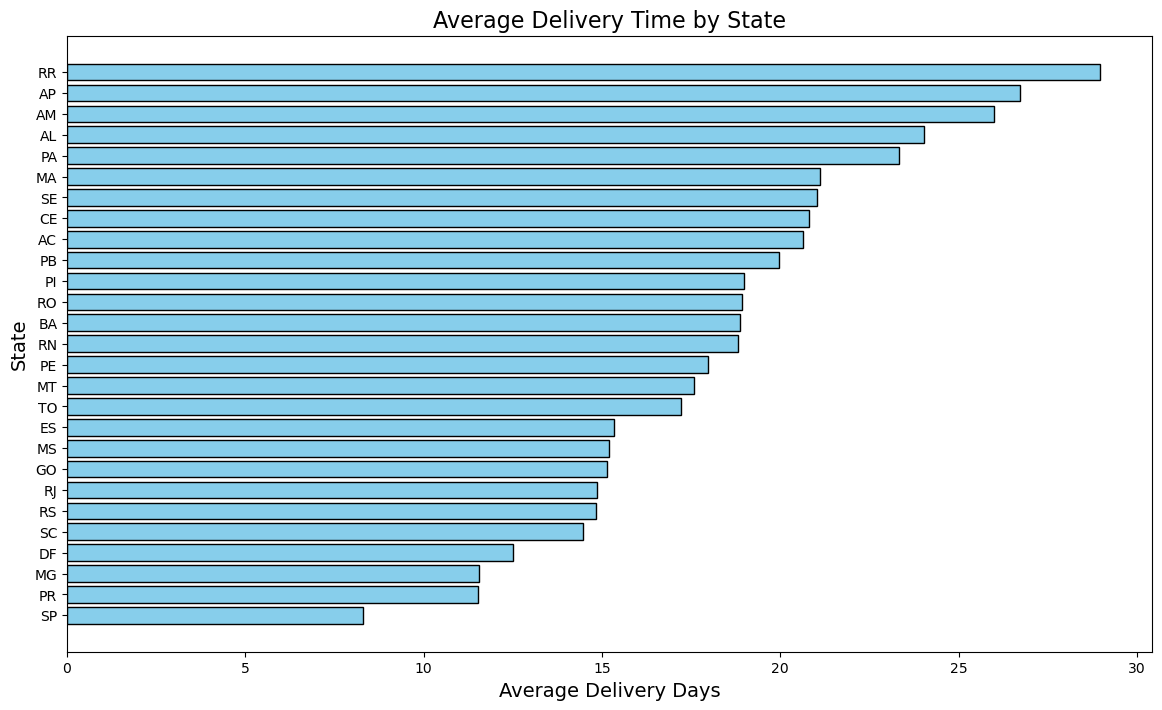

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))

# Sort states by average delivery days
state_delivery_stats_sorted = state_delivery_stats.sort_values('avg_delivery_days', ascending=True)

plt.barh(state_delivery_stats_sorted['customer_state'], state_delivery_stats_sorted['avg_delivery_days'], color='skyblue', edgecolor='black')

plt.title('Average Delivery Time by State', fontsize=16)
plt.xlabel('Average Delivery Days', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.show()


**Conclusion:**
- The states of São Paulo (SP), Paraná (PR), and Minas Gerais (MG) have the fastest delivery times, with averages around 10–12 days.
- The states of Roraima (RR), Amapá (AP), and Amazonas (AM) have the slowest delivery times, averaging over 25 days.
- This indicates strong regional delivery performance differences, likely driven by infrastructure availability, distance from distribution centers, and geographic challenges.
- Future logistics optimization could focus on improving delivery speeds to northern states.


<h2 style="color:Crimson;">Distribution of Number of Orders per City and per State</h2>

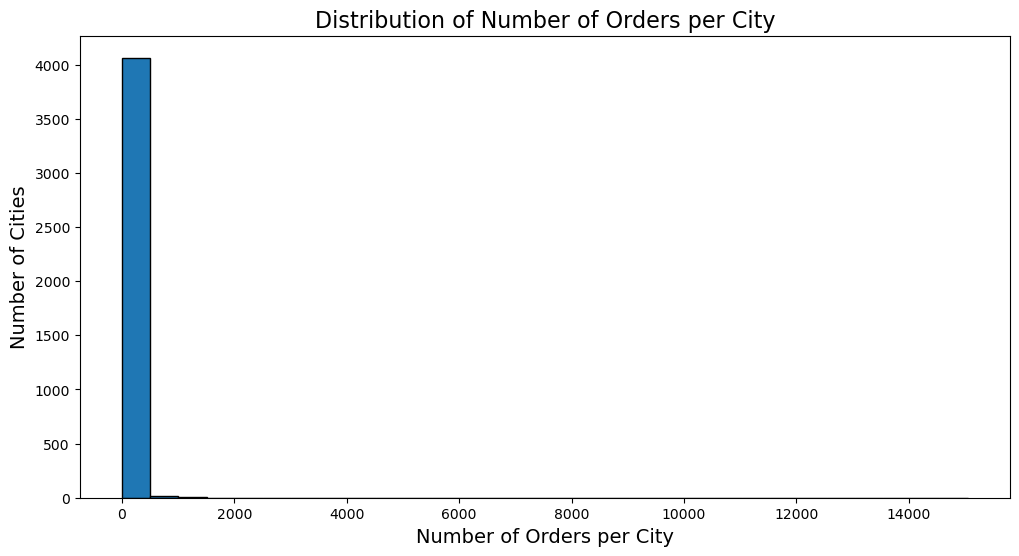

In [64]:
import matplotlib.pyplot as plt

# Distribution of number of orders per city
city_order_counts = delivered_orders['customer_city'].value_counts()

plt.figure(figsize=(12,6))
plt.hist(city_order_counts, bins=30, edgecolor='black')
plt.title('Distribution of Number of Orders per City', fontsize=16)
plt.xlabel('Number of Orders per City', fontsize=14)
plt.ylabel('Number of Cities', fontsize=14)
plt.show()


<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
The e-commerce market is extremely concentrated in big cities.</div>



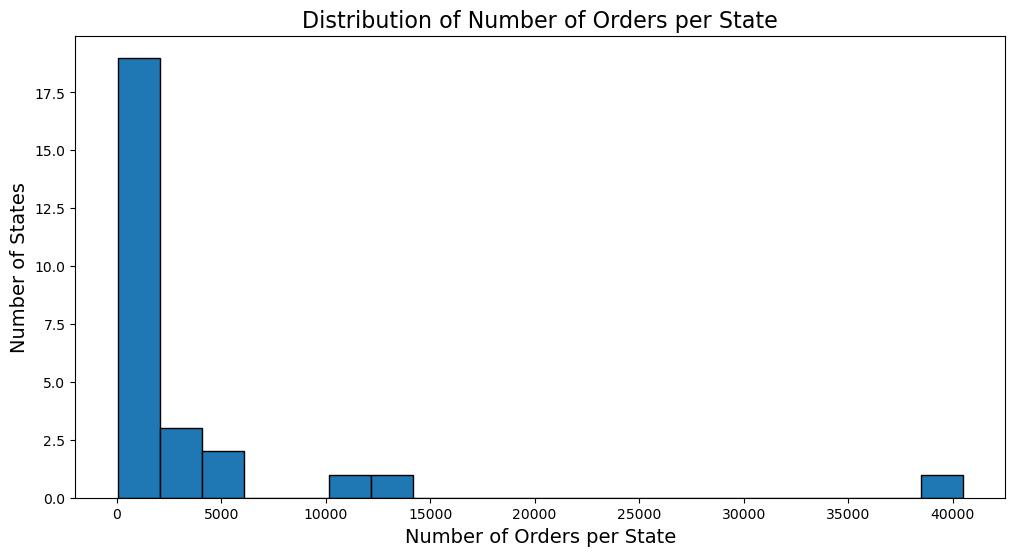

In [65]:
# Distribution of number of orders per state
state_order_counts = delivered_orders['customer_state'].value_counts()

plt.figure(figsize=(12,6))
plt.hist(state_order_counts, bins=20, edgecolor='black')
plt.title('Distribution of Number of Orders per State', fontsize=16)
plt.xlabel('Number of Orders per State', fontsize=14)
plt.ylabel('Number of States', fontsize=14)
plt.show()


<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
    
Distribution of Orders per State:

- Most Brazilian states have a relatively small number of orders.

- A few states dominate order volume — especially São Paulo (SP), which heavily skews the distribution.

Distribution of Orders per City:

- The distribution across cities is even more extreme:

- Very few cities have high order volumes, while most cities have very few orders.

- Demand is highly concentrated in a few regions.</div>


The company relies heavily on a few states for most of its revenue

<h2 style="color:Crimson;">Where Do Customers Spend More or Less (Cities and States)?</h2>

<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
In this section, I analyze where customers spend more or less across different Brazilian states and cities.  
I aggregate total payments per order, then calculate the average and standard deviation of spending for each state and each city.  
I visualize the distribution of average payment values to identify regions with higher purchasing power and uncover spending patterns across the country.
</div>

In [66]:
total_payments = payments.groupby('order_id')['payment_value'].sum().reset_index()

delivered_orders_payments = pd.merge(
    delivered_orders,
    total_payments,
    on='order_id',
    how='left'
)

delivered_orders_payments.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_year_month,actual_delivery_days,late_delivery,customer_city,customer_state,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,8.0,False,sao paulo,SP,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07,13.0,False,barreiras,BA,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08,9.0,False,vianopolis,GO,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11,13.0,False,sao goncalo do amarante,RN,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,2.0,False,santo andre,SP,28.62


### 1. Average Payment Value by State


In [67]:
# Group by customer_state and calculate average and standard deviation of payment_value
state_spending = delivered_orders_payments.groupby('customer_state')['payment_value'].agg(['mean', 'std', 'count']).reset_index()

state_spending.columns = ['customer_state', 'avg_payment_value', 'std_payment_value', 'num_orders']

# Sort by highest average spending
state_spending_sorted = state_spending.sort_values('avg_payment_value', ascending=False)

state_spending_sorted.head(10)


,customer_state,avg_payment_value,std_payment_value,num_orders
14,PB,266.604739,399.156363,517
0,AC,244.828125,231.906400,80
3,AP,240.922537,279.352729,67
1,AL,237.268992,280.911445,397
20,RO,234.467901,299.600200,243
13,PA,224.130603,282.812701,946
16,PI,221.160021,250.086633,476
21,RR,220.476098,213.899272,41
26,TO,219.005000,287.341179,274
19,RN,212.506962,242.091617,474


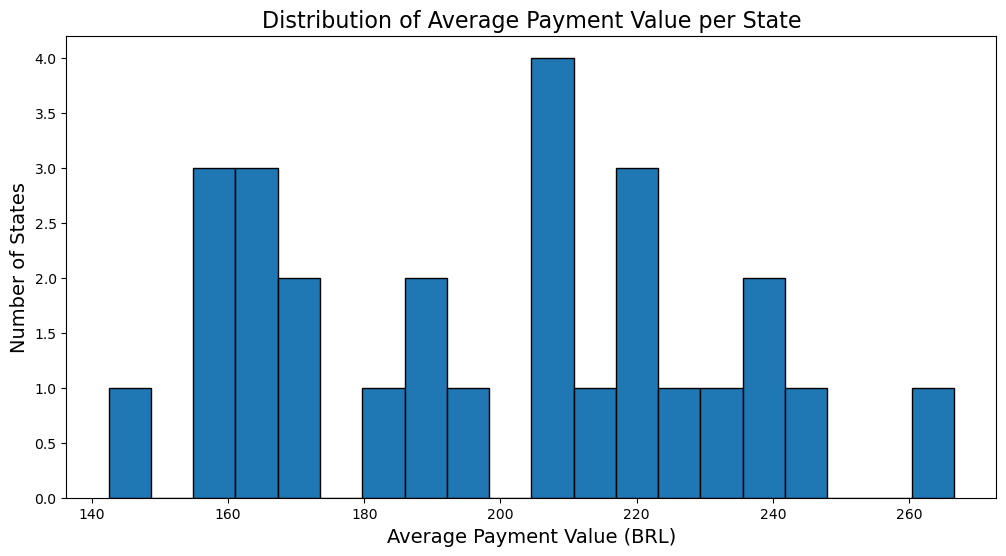

In [68]:
plt.figure(figsize=(12,6))
plt.hist(state_spending_sorted['avg_payment_value'], bins=20, edgecolor='black')
plt.title('Distribution of Average Payment Value per State', fontsize=16)
plt.xlabel('Average Payment Value (BRL)', fontsize=14)
plt.ylabel('Number of States', fontsize=14)
plt.show()


### 2. Average Payment Value by City


In [69]:
# Group by customer_city and calculate average and standard deviation of payment_value
city_spending = delivered_orders_payments.groupby('customer_city')['payment_value'].agg(['mean', 'std', 'count']).reset_index()

city_spending.columns = ['customer_city', 'avg_payment_value', 'std_payment_value', 'num_orders']

# Sort by highest average spending
city_spending_sorted = city_spending.sort_values('avg_payment_value', ascending=False)

city_spending_sorted.head(10)


,customer_city,avg_payment_value,std_payment_value,num_orders
2794,pianco,2324.99,NaN,1
2473,nova esperanca do piria,2252.66,NaN,1
1247,engenheiro navarro,2106.55,NaN,1
32,agrestina,2066.34,NaN,1
2216,mariental,1867.85,NaN,1
2097,loreto,1643.64,NaN,1
1593,ibitita,1534.58,NaN,1
2870,pirpirituba,1372.25,NaN,1
376,barao ataliba nogueira,1351.51,NaN,1
408,barra longa,1341.55,NaN,1


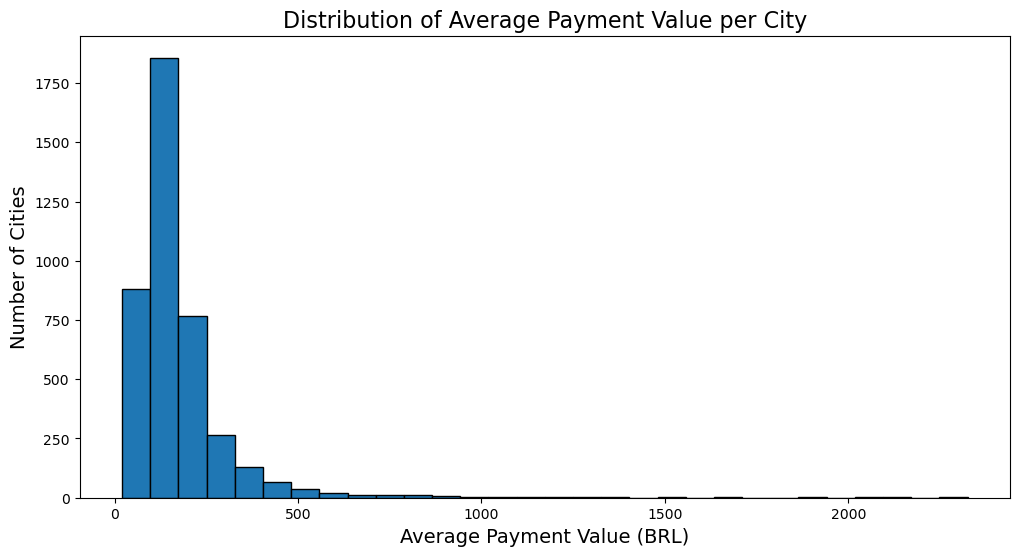

In [70]:
plt.figure(figsize=(12,6))
plt.hist(city_spending_sorted['avg_payment_value'], bins=30, edgecolor='black')
plt.title('Distribution of Average Payment Value per City', fontsize=16)
plt.xlabel('Average Payment Value (BRL)', fontsize=14)
plt.ylabel('Number of Cities', fontsize=14)
plt.show()


Insights:
- Customer spending across cities is highly skewed, with a few cities showing extremely high average order values. However, most cities fall under 300 BRL per order.
- State-level spending shows moderate dispersion, with most states clustering between 150 and 250 BRL, but the distribution is not uniform or normal; it displays multiple local peaks and irregularities.
- Proper modeling of state-level spending variations could require non-linear methods (e.g., polynomial or spline regressions) to capture the real behavior.
- Special targeting efforts could be designed for niche high-value cities to maximize revenue from premium customers.


#### Top 10 States by Average Payment Value

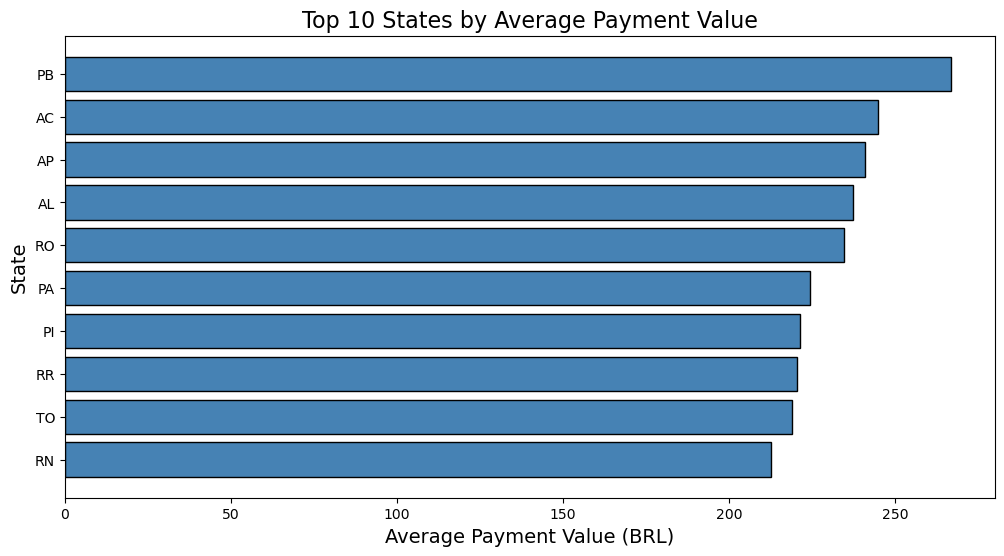

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.barh(state_spending_sorted['customer_state'].head(10), state_spending_sorted['avg_payment_value'].head(10), color='steelblue', edgecolor='black')
plt.title('Top 10 States by Average Payment Value', fontsize=16)
plt.xlabel('Average Payment Value (BRL)', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.gca().invert_yaxis()
plt.show()


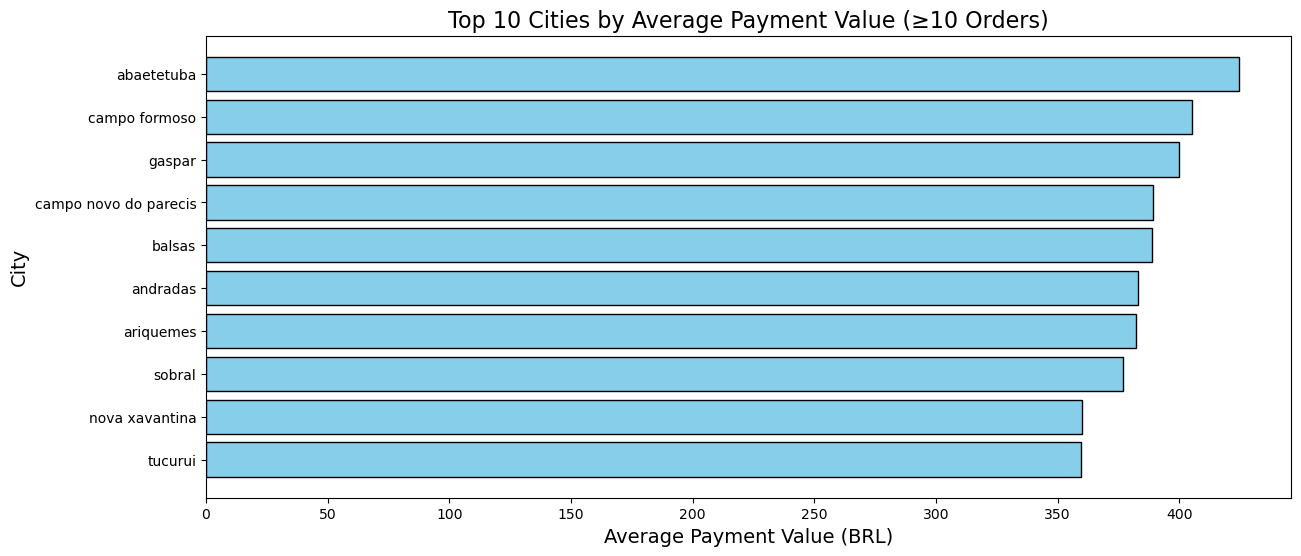

In [72]:
# Filter big cities (at least 10 orders)
big_cities = city_spending_sorted[city_spending_sorted['num_orders'] >= 10]

# Sort by average payment
big_cities_sorted = big_cities.sort_values('avg_payment_value', ascending=False)

# Plot Top 10 big cities
plt.figure(figsize=(14,6))
plt.barh(big_cities_sorted['customer_city'].head(10), 
         big_cities_sorted['avg_payment_value'].head(10), 
         color='skyblue', edgecolor='black')

plt.title('Top 10 Cities by Average Payment Value (≥10 Orders)', fontsize=16)
plt.xlabel('Average Payment Value (BRL)', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.gca().invert_yaxis()
plt.show()


<h2 style="color:Crimson;">Best-Selling Product Categories Overall</h2>

In [73]:
order_items.head(), products.head(), category_translation.head()


(                           order_id  order_item_id  \
 0  00010242fe8c5a6d1ba2dd792cb16214              1   
 1  00018f77f2f0320c557190d7a144bdd3              1   
 2  000229ec398224ef6ca0657da4fc703e              1   
 3  00024acbcdf0a6daa1e931b038114c75              1   
 4  00042b26cf59d7ce69dfabb4e55b4fd9              1   
 
                          product_id                         seller_id  \
 0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
 1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
 2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
 3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
 4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
 
    shipping_limit_date   price  freight_value  
 0  2017-09-19 09:45:35   58.90          13.29  
 1  2017-05-03 11:05:13  239.90          19.93  
 2  2018-01-18 14:48:30  199.00          17.87  
 3  2018-08-15 10:10:18   

In [74]:
# Merge order items with product info
order_items_products = order_items.merge(products, on='product_id', how='left')

# Merge with category translation
order_items_products = order_items_products.merge(category_translation, on='product_category_name', how='left')

order_items_products[['order_id', 'product_id', 'product_category_name_english']].head()


,order_id,product_id,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,garden_tools


In [75]:
# Merge with delivered orders to get city and state
order_items_full = order_items_products.merge(delivered_orders[['order_id', 'customer_city', 'customer_state']], on='order_id', how='inner')

order_items_full[['order_id', 'customer_city', 'customer_state', 'product_category_name_english']].head()


,order_id,customer_city,customer_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,campos dos goytacazes,RJ,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,santa fe do sul,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,para de minas,MG,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,atibaia,SP,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,varzea paulista,SP,garden_tools


### Top 10 Best-Selling Categories Overall

<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
In this section, I identify the top 10 best-selling product categories across the entire dataset.  
I use a bar chart to visualize the most popular categories based on the number of orders.  
This analysis highlights customer preferences and helps businesses understand which types of products drive the most sales.
</div>


In [76]:
top_categories = order_items_full['product_category_name_english'].value_counts().head(10)

top_categories


product_category_name_english
bed_bath_table           10953
health_beauty             9467
sports_leisure            8431
furniture_decor           8160
computers_accessories     7643
housewares                6795
watches_gifts             5857
telephony                 4430
garden_tools              4268
auto                      4139
Name: count, dtype: int64

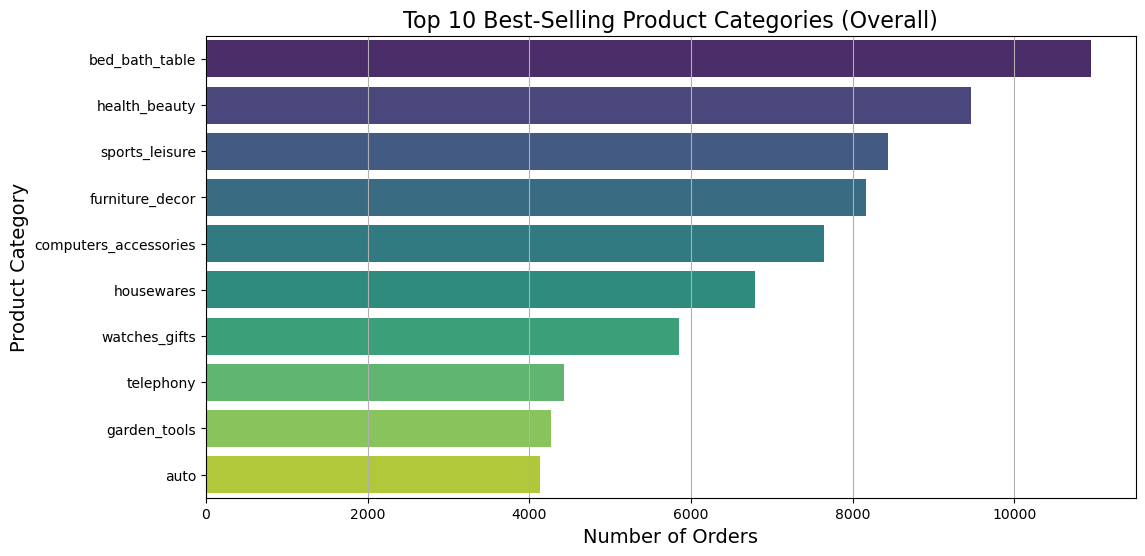

In [77]:
# Prepare DataFrame
top_categories_overall_df = order_items_full['product_category_name_english'].value_counts().head(10).reset_index()
top_categories_overall_df.columns = ['product_category', 'num_orders']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_categories_overall_df,
    x='num_orders',
    y='product_category',
    hue='product_category',  # <-- ADD this
    palette='viridis',
    dodge=False,              # <-- IMPORTANT: to prevent separation
    legend=False              # <-- Hide redundant legend
)
plt.title('Top 10 Best-Selling Product Categories (Overall)', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.grid(axis='x')
plt.show()


<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
<b>Conclusion:</b> The most popular product categories overall are dominated by home-related products (bed, bath, decor, housewares) and personal care (health, beauty). Technology (computers, telephony) and sports products are also strong segments.</div>


### Two best-selling product categories 

<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
In this section, I focus only on the two best-selling product categories overall. I analyze how widely each of these categories is distributed across different cities.</div>

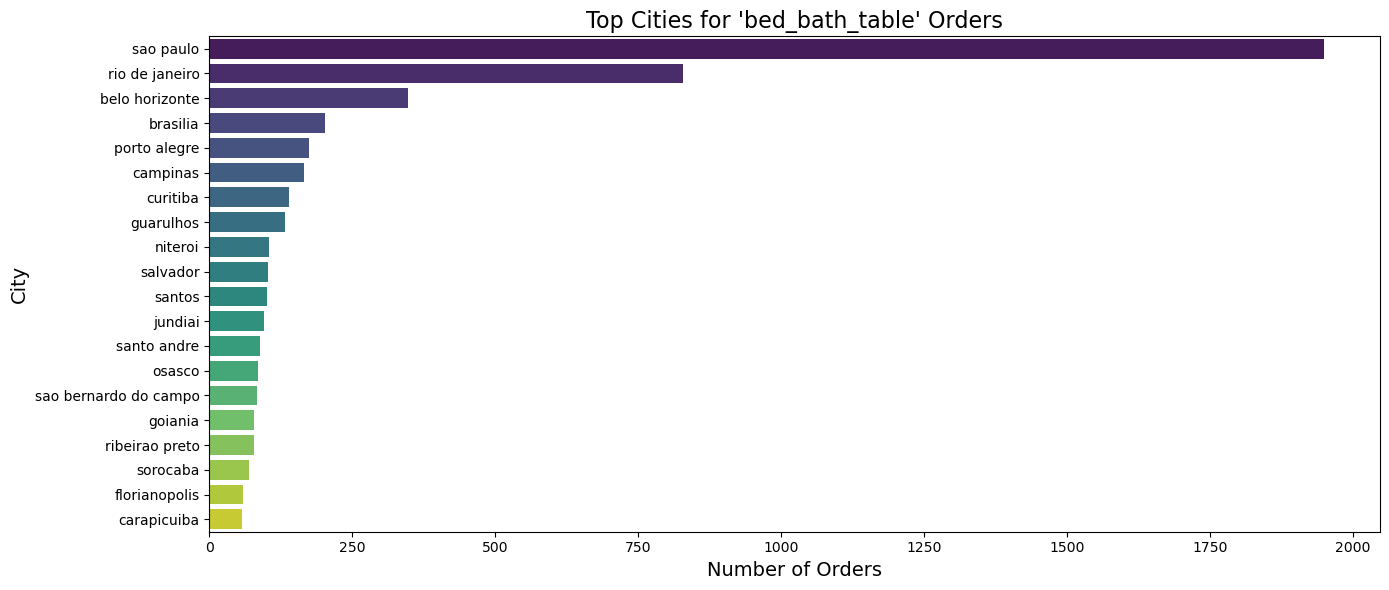

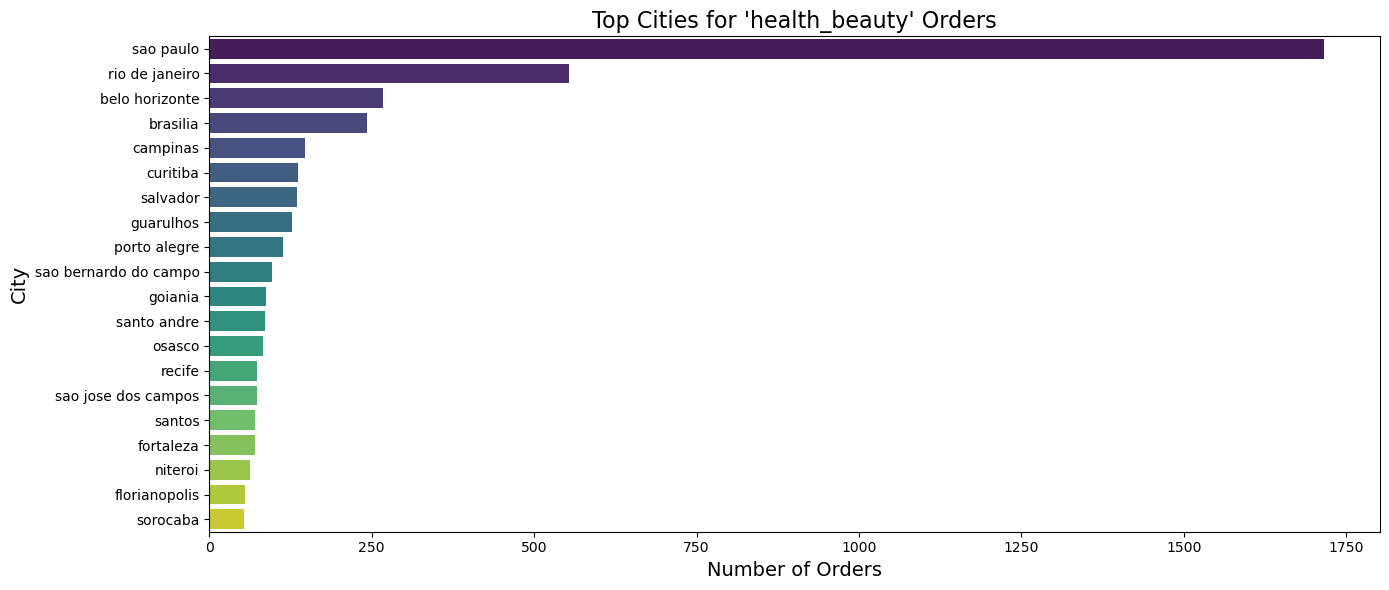

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

for category in top_2_categories:
    plt.figure(figsize=(14,6))
    subset = category_city_counts[category_city_counts['product_category_name_english'] == category]
    subset_sorted = subset.sort_values('order_count', ascending=False).head(20)  # show top 20 cities for better view

    sns.barplot(
        data=subset_sorted,
        x='order_count',
        y='customer_city',
        hue='customer_city',   # <-- this links hue and palette correctly
        palette='viridis',
        dodge=False,
        legend=False
    )
    plt.title(f"Top Cities for '{category}' Orders", fontsize=16)
    plt.xlabel('Number of Orders', fontsize=14)
    plt.ylabel('City', fontsize=14)
    plt.tight_layout()
    plt.show()


<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
Demand is highly concentrated in major cities, particularly São Paulo and Rio de Janeiro, which account for a significant share of orders in both categories.
This suggests that businesses targeting these categories should prioritize these cities when planning marketing strategies, inventory allocation, and logistics.</div>

### Product Category Diversity by State

<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
I calculate the number of unique product categories ordered in each state. This helps understand whether customer demand is broad and varied (high diversity) or narrow and focused on specific needs (low diversity).</div>

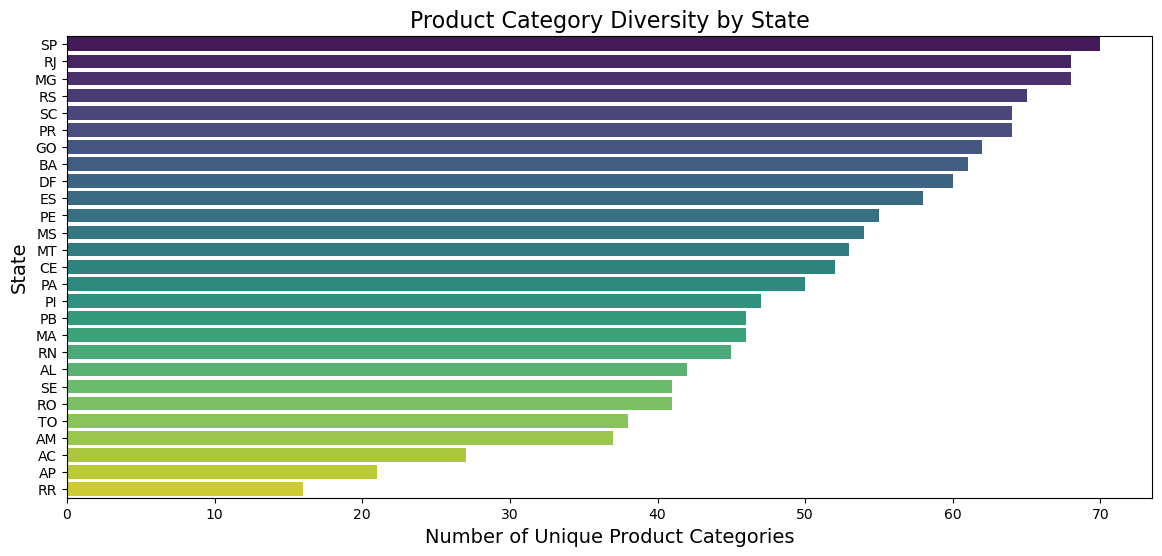

In [79]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=state_category_diversity_sorted, 
    x='product_category_name_english', 
    y='customer_state', 
    hue='customer_state',    # Fix added here
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title('Product Category Diversity by State', fontsize=16)
plt.xlabel('Number of Unique Product Categories', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.show()


<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
Conclusions:

- States like São Paulo (SP) and Rio de Janeiro (RJ) show the highest category diversity, suggesting mature, varied consumer demand.

- Smaller states tend to have lower diversity, possibly reflecting more focused market needs.
</div>

<h2 style="color:Crimson;">Seller Distribution Across Cities</h2>

<div style="background-color:#e0f7fa; padding:10px; border-radius:5px;">
In this section, I analyze how sellers are distributed across cities in Brazil.  
First I visualize the overall distribution of the number of sellers per city, then highlight the top 10 cities with the highest number of sellers.  
This analysis provides insight into the concentration of sellers and helps identify key commercial hubs within the country.
</div>

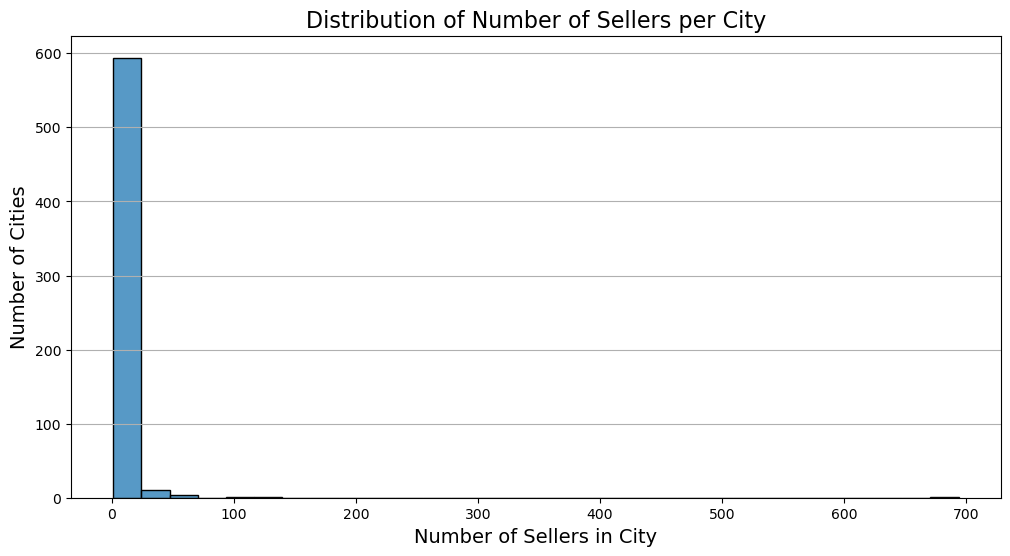

In [80]:
# Number of sellers per city
sellers_per_city = sellers['seller_city'].value_counts()

sellers_per_city.head()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(sellers_per_city, bins=30, edgecolor='black')
plt.title('Distribution of Number of Sellers per City', fontsize=16)
plt.xlabel('Number of Sellers in City', fontsize=14)
plt.ylabel('Number of Cities', fontsize=14)
plt.grid(axis='y')
plt.show()


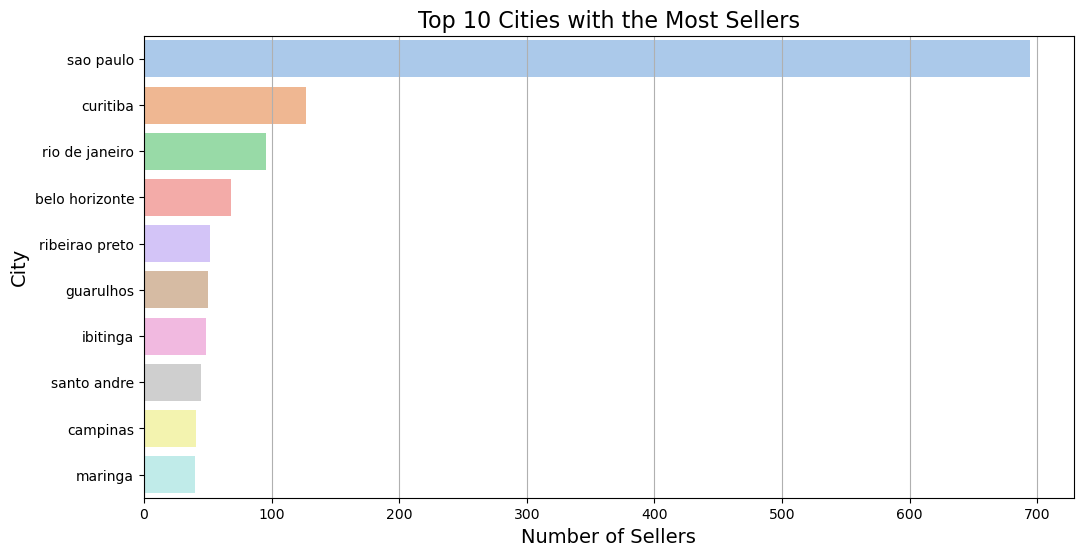

In [81]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=top_10_seller_cities.values, 
    y=top_10_seller_cities.index, 
    hue=top_10_seller_cities.index,   # Fix: assign hue
    palette='pastel',
    dodge=False,
    legend=False
)

plt.title('Top 10 Cities with the Most Sellers', fontsize=16)
plt.xlabel('Number of Sellers', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.grid(axis='x')
plt.show()
